In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime # for datetime processing

# Import for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot

# Import for Map Visualization
import folium
from folium import plugins


In [2]:
# reading the data
data = pd.read_csv('drone-strikes-dataset.csv')

In [5]:
# No. of rows and columns
print("Numbers of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Numbers of rows: 406
Number of columns: 26


In [6]:
# first five rows of data
data.head()

,S#,Date,Year,Time,Location,City,Province,No of Strikes,Al-Qaeda,Taliban,...,Injured Min,Injured,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F)
0,1.0,"Friday, June 18, 2004",2004.0,22:00,Near Wana,South Waziristan,FATA,1.0,NaN,1.0,...,NaN,NaN,N,Blast occured in courtyard of the house of lon...,Village in Wana,http://archives.dawn.com/2004/06/19/top1.htm,69.9000,33.0333,28.475,83.255
1,2.0,"Sunday, May 08, 2005",2005.0,23:30,Mir Ali (Near Afghan Border),North Waziristan,FATA,1.0,1.0,NaN,...,NaN,NaN,N,Drone struck a car driven by local warlord- ki...,Civilian killied was Samiullah Khan who was a ...,http://www.msnbc.msn.com/id/7847008/,70.1455,32.9746,11.475,52.655
2,3.0,"Thursday, December 01, 2005",2005.0,NaN,Haisori- Miran Shah,North Waziristan,FATA,1.0,1.0,NaN,...,NaN,2.0,NaN,Explosive occurred at a mud house,No. 3 Al-Qaeda's Leader AbuHamza Rabia killed ...,http://edition.cnn.com/2005/WORLD/asiapcf/12/0...,70.1455,32.9746,7.080,44.744
3,4.0,"Friday, January 06, 2006",2006.0,NaN,Saidgai village- 115km north of Wana,North Waziristan,FATA,1.0,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,http://www.reuters.com/article/2007/04/27/us-p...,70.1455,32.9746,0.535,32.963
4,5.0,"Friday, January 13, 2006",2006.0,3:00,Damadola Village,Bajaur Agency,FATA,1.0,NaN,NaN,...,NaN,2.0,Y,Three houses were tarheted in Damadola village...,Masood Khan house was among those bombed. Want...,http://www.dailytimes.com.pk/default.asp?page=...,71.5000,34.6833,10.025,50.045


In [7]:
# Checking null values
data.isnull().sum()

S#                          1
Date                        1
Year                        1
Time                      231
Location                    2
City                        1
Province                    1
No of Strikes               1
Al-Qaeda                  308
Taliban                   264
Civilians Min              69
Civilians Max              46
Foreigners Min            312
Foreigners Max            265
Total Died Min             97
Killed                      3
Injured Min               260
Injured                   129
Women/Children             69
Special Mention (Site)     75
Comments                  229
References                  7
Longitude                   1
Latitude                    1
Temperature(C)              2
Temperature(F)              2
dtype: int64

In [8]:
# Data types of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S#                      405 non-null    float64
 1   Date                    405 non-null    object 
 2   Year                    405 non-null    float64
 3   Time                    175 non-null    object 
 4   Location                404 non-null    object 
 5   City                    405 non-null    object 
 6   Province                405 non-null    object 
 7   No of Strikes           405 non-null    float64
 8   Al-Qaeda                98 non-null     float64
 9   Taliban                 142 non-null    float64
 10  Civilians Min           337 non-null    float64
 11  Civilians Max           360 non-null    float64
 12  Foreigners Min          94 non-null     float64
 13  Foreigners Max          141 non-null    float64
 14  Total Died Min          309 non-null    fl

In [9]:
#There are total 430 drone strikes happened in Pakistan.
# Number of drone strikes in each area
no_of_strikes_in_each_area = pd.DataFrame(data['City'].value_counts().values,
             columns=['Number_of_Drone_Strikes'],
             index=data['City'].value_counts().index)
no_of_strikes_in_each_area

,Number_of_Drone_Strikes
North Waziristan,289
South Waziristan,93
Kurram Agency,6
Khyber Agency,5
Bajaur Agency,4
Bannu,3
Hangu,2
Khyber,1
Orakzai,1
Dalbandin,1


In [10]:
percent_collective_waziristan = round(len(data[(data['City'] == 'North Waziristan') | (data['City'] == 'South Waziristan') | (data['City'] == 'North/South Waziristan')]) / len(data), 2)
percent_south_waziristan = round(len(data[data['City'] == 'South Waziristan']) / len(data), 2)
percent_north_waziristan = round(len(data[data['City'] == 'North Waziristan']) / len(data), 2)

print(f"Percentage of Drone Strikes done in whole Waziristan: {percent_collective_waziristan * 100}%")
print(f"Percentage of Drone Strikes done in South Waziristan only: {percent_south_waziristan* 100}%")
print(f"Percentage of Drone Strikes done in North Waziristan: {percent_north_waziristan * 100}%")

Percentage of Drone Strikes done in whole Waziristan: 94.0%
Percentage of Drone Strikes done in South Waziristan only: 23.0%
Percentage of Drone Strikes done in North Waziristan: 71.0%


In [11]:
#Spelling of [ Total Dies Max ] column name need to correct by apply the rename function on Data for consistency
data.columns

Index(['S#', 'Date', 'Year', 'Time', 'Location', 'City', 'Province',
       'No of Strikes', 'Al-Qaeda', 'Taliban', 'Civilians Min',
       'Civilians Max', 'Foreigners Min', 'Foreigners Max', 'Total Died Min',
       'Killed', 'Injured Min', 'Injured ', 'Women/Children  ',
       'Special Mention (Site)', 'Comments', 'References', 'Longitude',
       'Latitude', 'Temperature(C)', 'Temperature(F)'],
      dtype='object')

In [12]:
#Remove all whitespaces/extra spaces from columns Name like [ 'Women/Children ' ]
data = data.rename(columns=lambda x: x.strip())
data.columns

Index(['S#', 'Date', 'Year', 'Time', 'Location', 'City', 'Province',
       'No of Strikes', 'Al-Qaeda', 'Taliban', 'Civilians Min',
       'Civilians Max', 'Foreigners Min', 'Foreigners Max', 'Total Died Min',
       'Killed', 'Injured Min', 'Injured', 'Women/Children',
       'Special Mention (Site)', 'Comments', 'References', 'Longitude',
       'Latitude', 'Temperature(C)', 'Temperature(F)'],
      dtype='object')

In [13]:
# Drop extra column names like [S#]
df = data.drop('S#', axis=1)
df.shape

(406, 25)

In [14]:
df.isna().sum()

Date                        1
Year                        1
Time                      231
Location                    2
City                        1
Province                    1
No of Strikes               1
Al-Qaeda                  308
Taliban                   264
Civilians Min              69
Civilians Max              46
Foreigners Min            312
Foreigners Max            265
Total Died Min             97
Killed                      3
Injured Min               260
Injured                   129
Women/Children             69
Special Mention (Site)     75
Comments                  229
References                  7
Longitude                   1
Latitude                    1
Temperature(C)              2
Temperature(F)              2
dtype: int64

In [15]:
#Fill by Zero(0) in all nonString Columns
for x, xRow in df.iteritems():
    if (xRow.dtype != 'object'):
        df[x] = df[x].fillna(0)
        
df.isna().sum()

Date                        1
Year                        0
Time                      231
Location                    2
City                        1
Province                    1
No of Strikes               0
Al-Qaeda                    0
Taliban                     0
Civilians Min               0
Civilians Max               0
Foreigners Min              0
Foreigners Max              0
Total Died Min              0
Killed                      0
Injured Min                 0
Injured                     0
Women/Children             69
Special Mention (Site)     75
Comments                  229
References                  7
Longitude                   0
Latitude                    0
Temperature(C)              0
Temperature(F)              0
dtype: int64

In [16]:
#Verify the Data type of Columns

fltCols = {'Longitude', 'Latitude', 'Temperature(C)', 'Temperature(F)'}
strCols = {'Date', 'Time', 'Location', 'City', 'Province', 'Women/Children', 'Special Mention (Site)', 'Comments', 'References'}
numCols = {'No of Strike', 'Al-Qaeda', 'Taliban', 'Civilians Min', 'Civilians Max', 'Foreigners Min', 'Foreigners Max', 
           'Total Died Min', 'Total Died Max', 'Injured Min', 'Injured Max'}

for x, xCols in df.iteritems():
    if x in fltCols:
        df[x] = df[x].astype('float64')
    if x in strCols:
        df[x] = df[x].str.lower()
        df[x] = df[x].astype('object')
    if x in numCols:
        df[x] = df[x].astype('int64')
    
#    print(x, df[x].dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    405 non-null    object 
 1   Year                    406 non-null    float64
 2   Time                    175 non-null    object 
 3   Location                404 non-null    object 
 4   City                    405 non-null    object 
 5   Province                405 non-null    object 
 6   No of Strikes           406 non-null    float64
 7   Al-Qaeda                406 non-null    int64  
 8   Taliban                 406 non-null    int64  
 9   Civilians Min           406 non-null    int64  
 10  Civilians Max           406 non-null    int64  
 11  Foreigners Min          406 non-null    int64  
 12  Foreigners Max          406 non-null    int64  
 13  Total Died Min          406 non-null    int64  
 14  Killed                  406 non-null    fl

In [17]:
df.tail()

,Date,Year,Time,Location,City,Province,No of Strikes,Al-Qaeda,Taliban,Civilians Min,...,Injured Min,Injured,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F)
401,"monday july 03, 2017",2017.0,NaN,marghalan village,south waziristan,fata,2.0,0,0,0,...,0,0.0,n,a cia-operated drone carried out a missile att...,NaN,https://www.dawn.com/news/1343100,32.120819,69.589987,23.0,74.000
402,"friday september 15, 2017",2017.0,NaN,ghuz ghari,kurram agency,fata,2.0,0,0,0,...,2,2.0,n,a us drone killed three suspected afghan talib...,NaN,https://www.dawn.com/news/1357853; https://www...,33.732174,70.150755,21.3,70.331
403,"monday october 16, 2017",2017.0,17:37,kurram district,kurram agency,fata,4.0,0,5,0,...,0,0.0,n,one of the dead was identified by local offici...,conflict of report: foreign media reported tha...,http://www.thesundaily.my/news/2017/10/18/deat...,33.736222,70.195576,16.7,62.070
404,"thursday november 30,2017",2017.0,4:30,near pak-afghan border,kurram agency,fata,2.0,0,1,2,...,0,0.0,n,"taliban commander rasheed, is among the killed",unverified reports suggest the target of the s...,https://www.geo.tv/latest/170034-three-reporte...,33.732174,70.150755,8.2,39.200
405,NaN,0.0,NaN,NaN,NaN,NaN,0.0,49,663,1306,...,402,1329.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000


In [18]:
# Fill Data in Date Column

df['Date'] = df['Date'].fillna(0)
df[df['Date'].isna()]

,Date,Year,Time,Location,City,Province,No of Strikes,Al-Qaeda,Taliban,Civilians Min,...,Injured Min,Injured,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F)


In [19]:
df[df['Date'] == 0 ]

,Date,Year,Time,Location,City,Province,No of Strikes,Al-Qaeda,Taliban,Civilians Min,...,Injured Min,Injured,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F)
405,0,0.0,NaN,NaN,NaN,NaN,0.0,49,663,1306,...,402,1329.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [20]:
# Drop Rows where date is Zero [0]

df = df.drop(df[df['Date'] == 0].index)
df[df['Date'] == 0 ]

,Date,Year,Time,Location,City,Province,No of Strikes,Al-Qaeda,Taliban,Civilians Min,...,Injured Min,Injured,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F)


In [21]:
#Remove spaces from start & end of date and replace comma(,) with hyphen(-), find the Max & Min year from Date

df['Date'] = df['Date'].str.strip()
df['Date'] = df['Date'].str.replace(',', '-')
print("Max Year: ", pd.DatetimeIndex(df['Date']).year.max(),
      "\nMin Year: ", pd.DatetimeIndex(df['Date']).year.min())

Max Year:  2017 
Min Year:  2004


In [22]:
# Number of Rows as per City Name
df['City'].value_counts()

north waziristan    289
south waziristan     93
kurram agency         6
khyber agency         5
bajaur  agency        4
bannu                 3
hangu                 2
khyber                1
orakzai               1
dalbandin             1
Name: City, dtype: int64

In [23]:
# Rename the Cities name for Consistancy
df['City'] = df['City'].str.replace('bajaur  agency', 'bajaur agency')
df['City'] = df['City'].str.replace('hungu', 'hangu')
df['City'].value_counts()

north waziristan    289
south waziristan     93
kurram agency         6
khyber agency         5
bajaur agency         4
bannu                 3
hangu                 2
khyber                1
orakzai               1
dalbandin             1
Name: City, dtype: int64

In [24]:
# Create Year Column from Date Column
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Date,Year,Time,Location,City,Province,No of Strikes,Al-Qaeda,Taliban,Civilians Min,...,Injured,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F),year
0,friday- june 18- 2004,2004.0,22:00,near wana,south waziristan,fata,1.0,0,1,0,...,0.0,n,blast occured in courtyard of the house of lon...,village in wana,http://archives.dawn.com/2004/06/19/top1.htm,69.9000,33.0333,28.475,83.255,2004
1,sunday- may 08- 2005,2005.0,23:30,mir ali (near afghan border),north waziristan,fata,1.0,1,0,0,...,0.0,n,drone struck a car driven by local warlord- ki...,civilian killied was samiullah khan who was a ...,http://www.msnbc.msn.com/id/7847008/,70.1455,32.9746,11.475,52.655,2005
2,thursday- december 01- 2005,2005.0,NaN,haisori- miran shah,north waziristan,fata,1.0,1,0,0,...,2.0,NaN,explosive occurred at a mud house,no. 3 al-qaeda's leader abuhamza rabia killed ...,http://edition.cnn.com/2005/world/asiapcf/12/0...,70.1455,32.9746,7.080,44.744,2005
3,friday- january 06- 2006,2006.0,NaN,saidgai village- 115km north of wana,north waziristan,fata,1.0,0,0,0,...,2.0,NaN,NaN,NaN,http://www.reuters.com/article/2007/04/27/us-p...,70.1455,32.9746,0.535,32.963,2006
4,friday- january 13- 2006,2006.0,3:00,damadola village,bajaur agency,fata,1.0,0,0,0,...,2.0,y,three houses were tarheted in damadola village...,masood khan house was among those bombed. want...,http://www.dailytimes.com.pk/default.asp?page=...,71.5000,34.6833,10.025,50.045,2006


In [25]:
df[df['year'] == 2004][['Al-Qaeda', 'Taliban', 'Civilians Min', 'Civilians Max', 
                        'Foreigners Min', 'Foreigners Max', 'Total Died Min',
                        'Injured Min']]

,Al-Qaeda,Taliban,Civilians Min,Civilians Max,Foreigners Min,Foreigners Max,Total Died Min,Injured Min
0,0,1,0,4,0,0,0,0


In [26]:
# People Killed & Injured per Year In Last 12-Years
dfKill = pd.DataFrame(df, columns=['year', 'Al-Qaeda', 'Taliban', 
                                   'Civilians Min', 'Civilians Max', 
                                   'Foreigners Min', 'Foreigners Max', 
                                   'Total Died Min', 'Killed', 
                                   'Injured Min', 'Injured', 'No of Strikes'])

dfKill['Civilians'] = ((dfKill['Civilians Min'] + dfKill['Civilians Max'])/2).apply(np.ceil).astype('int64')
dfKill['Foreigners'] = ((dfKill['Foreigners Min'] + dfKill['Foreigners Max'])/2).apply(np.ceil).astype('int64')
dfKill['Total-Injured'] = ((dfKill['Injured Min'] + dfKill['Injured'])/2).apply(np.ceil).astype('int64')
dfKill['Total-Killed'] = ((dfKill['Total Died Min'] + dfKill['Killed'])/2).apply(np.ceil).astype('int64')

dfKill.rename( columns={'No of Strikes' : 'No-of-strike'}, inplace=True)
dfKill['No-of-strike'] = (dfKill['No-of-strike']).apply(np.ceil).astype('int64')

dfKill = dfKill.drop(['Civilians Min', 'Civilians Max', 'Foreigners Min', 'Foreigners Max', 
                      'Total Died Min', 'Killed', 'Injured Min', 'Injured'], axis=1)
#dfKill
dfKillbyYear = dfKill.groupby(['year'], as_index=False).sum().sort_values('year', ascending=False)
dfKillbyYear

,year,Al-Qaeda,Taliban,No-of-strike,Civilians,Foreigners,Total-Injured,Total-Killed
13,2017,0,15,15,5,0,2,49
12,2016,0,1,6,1,0,1,7
11,2015,4,51,28,15,5,12,92
10,2014,0,131,52,6,24,38,179
9,2013,5,83,56,53,11,57,135
8,2012,7,80,105,175,30,64,268
7,2011,6,54,79,362,21,95,479
6,2010,1,110,123,681,53,285,806
5,2009,13,112,57,404,35,225,495
4,2008,11,25,55,214,52,113,301


In [27]:
print('People Kill in Last 12-Years: ', dfKillbyYear[dfKillbyYear['year'] > dfKillbyYear['year'].max()-12 ]['Total-Killed'].sum() )
print('People Injured in Last 12-Years: ', dfKillbyYear[dfKillbyYear['year'] > dfKillbyYear['year'].max()-12 ]['Total-Injured'].sum() )

People Kill in Last 12-Years:  2899
People Injured in Last 12-Years:  913


In [28]:
for x, xCols in dfKill.iteritems():
    if(x != 'year'):
        print(x, ": ", dfKill[x].sum())

Al-Qaeda :  49
Taliban :  663
No-of-strike :  588
Civilians :  2004
Foreigners :  235
Total-Injured :  914
Total-Killed :  2906


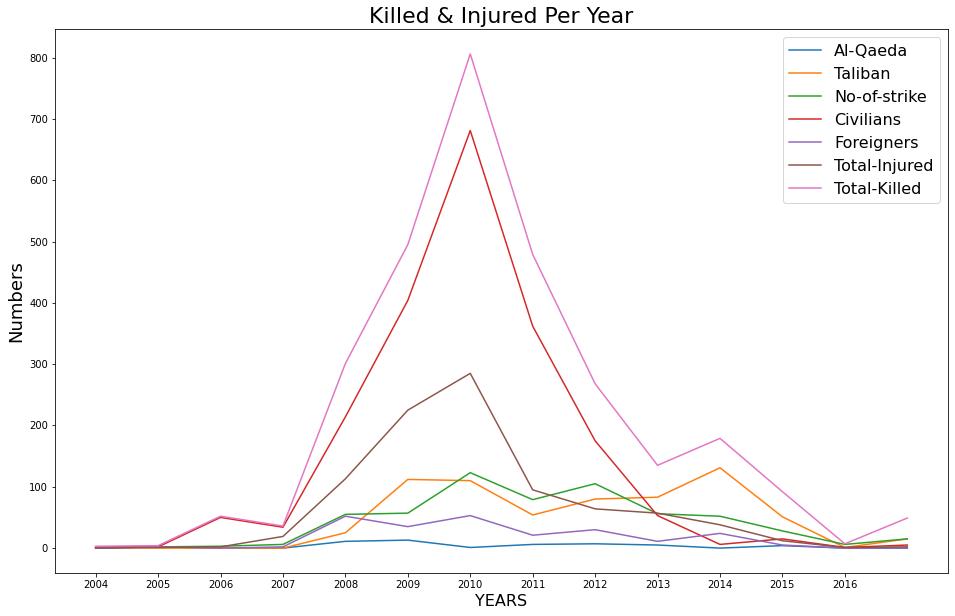

In [29]:
#Visuallization of Per Year Killed & Injured

fig = plt.figure(figsize=(16, 10))
x = dfKillbyYear['year']
for y, yCols in dfKillbyYear.iteritems():
    if(y != 'year'):
        plt.plot(x, dfKillbyYear[y], label = y)

plt.xticks(range(dfKillbyYear['year'].min(), dfKillbyYear['year'].max()))
plt.xlabel("YEARS", fontsize=16)
plt.ylabel("Numbers", fontsize=18)
plt.title("Killed & Injured Per Year", fontsize=22)
plt.legend(fontsize = 16)
plt.show()

In [30]:
def plotData(df, xColName, yColName):
    
    figKill = [go.Bar(y = df[yColName],
                      x = df[xColName],
                      text = np.round((df[yColName]), 1),
                      textposition = 'outside',
                      width = [0.7, 0.7],
                      marker = dict(color = 'darkorchid', #'lightblue',
                                    line_color = 'cadetblue', #'black',
                                    line_width = 2))]
    
    layout = go.Layout(title= yColName +' Killed Per Year',
                       xaxis = dict(title = xColName),
                       yaxis = dict(title = yColName),
                       width = 800,
                       height = 600,
                       template = 'plotly_white')

    myfig = go.Figure(data = figKill, layout = layout)
    
    return myfig

In [31]:
for x, xCols in dfKillbyYear.iteritems():
    if(x != 'year'):
        plotfig = plotData(dfKillbyYear, 'year', x)
#        plotfig = plotData(dfKillbyYear, 'year', x)
        iplot(plotfig)

In [33]:
#Attacks Involved Killing of Al-Qaeda and Taliban Terrorists

dfKill.head()

,year,Al-Qaeda,Taliban,No-of-strike,Civilians,Foreigners,Total-Injured,Total-Killed
0,2004,0,1,1,2,0,0,3
1,2005,1,0,1,1,0,0,1
2,2005,1,0,1,1,2,1,3
3,2006,0,0,1,0,0,1,2
4,2006,0,0,1,9,0,1,9


In [35]:
print('Number of Attacks Involved Killing of Terrorists from Taliban: ', dfKill[dfKill['Taliban'] > 0]['No-of-strike'].sum() )
print('Number of Attacks Involved Killing of Terrorists from Al-Qaeda: ', dfKill[dfKill['Al-Qaeda'] > 0]['No-of-strike'].sum() )

Number of Attacks Involved Killing of Terrorists from Taliban:  140
Number of Attacks Involved Killing of Terrorists from Al-Qaeda:  32


In [37]:
print('Total Taliban Killed: ', dfKill[dfKill['Taliban'] > 0 ]['No-of-strike'].sum() )
print('Total Al-Qaeda Killed: ', dfKill[dfKill['Al-Qaeda'] > 0 ]['No-of-strike'].sum() )
print('---------------------------------------------------' )
print('Total Drone Attacks: ', dfKill['No-of-strike'].sum() )

Total Taliban Killed:  140
Total Al-Qaeda Killed:  32
---------------------------------------------------
Total Drone Attacks:  588


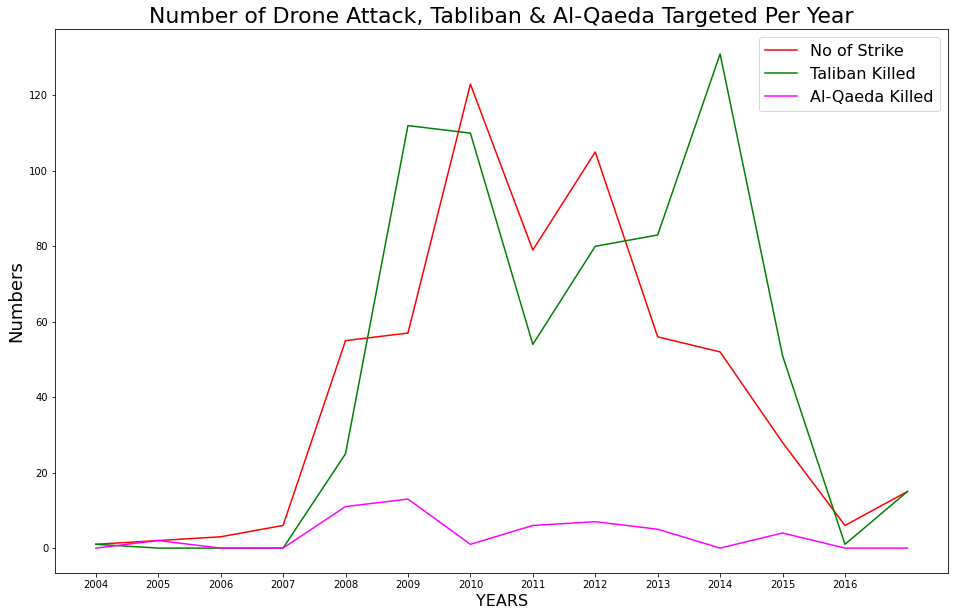

In [39]:
dfStriker = dfKillbyYear.drop(['Civilians', 'Foreigners', 'Total-Injured', 'Total-Killed'], axis=1)

fig = plt.figure(figsize=(16, 10))
x = dfStriker['year']#.keys()

plt.plot(x, dfStriker['No-of-strike'], color='red', label = 'No of Strike')
plt.plot(x, dfStriker['Taliban'], color='green', label = 'Taliban Killed')
plt.plot(x, dfStriker['Al-Qaeda'], color='magenta', label = 'Al-Qaeda Killed')

plt.xticks(range(df['year'].min(), df['year'].max()))
plt.xlabel("YEARS", fontsize=16)
plt.ylabel("Numbers", fontsize=18)
plt.title("Number of Drone Attack, Tabliban & Al-Qaeda Targeted Per Year", fontsize=22)
plt.legend(fontsize = 16)
plt.show()

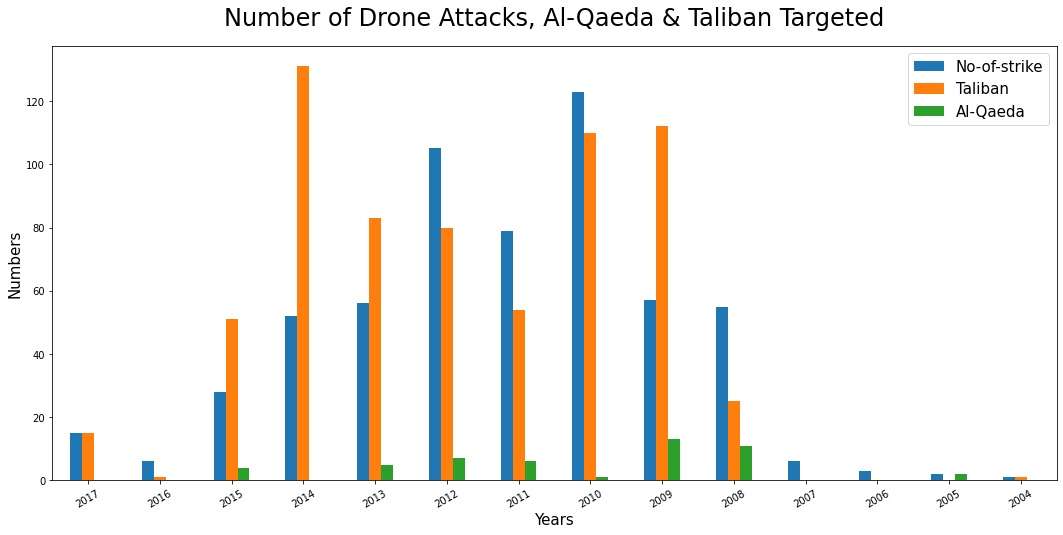

In [40]:
fig = dfStriker.plot(x='year', 
                y=['No-of-strike', 'Taliban', 'Al-Qaeda'], 
                kind="bar", 
                figsize=(18,8), align='center'
                 )
fig.set_title("Number of Drone Attacks, Al-Qaeda & Taliban Targeted", pad=20, fontdict={'fontsize':24})
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Years", fontsize=15)
plt.ylabel("Numbers", fontsize=15)
fig.legend(loc=1,fontsize=15)

In [42]:
#Women & Children Involved

# Fill Empty with 'n' and replace 'y' with 1 and 'n' with 0
# Where y & 1 = Yes,    n & 0 = No
df['Women/Children'] = df['Women/Children'].fillna('n')
df['Women/Children'] = df['Women/Children'].replace('y', 1)
df['Women/Children'] = df['Women/Children'].replace('n', 0)
df['Women/Children'] = df['Women/Children'].astype('int64')
print('Number of Attacks Involved Women and Children: ', df[df['Women/Children'] == 1]['No of Strikes'].sum() )
print('Number of Attacks Not Involved Women and Children: ', df[df['Women/Children'] == 0]['No of Strikes'].sum() )

Number of Attacks Involved Women and Children:  48.0
Number of Attacks Not Involved Women and Children:  540.0


Text(0, 0.5, 'Numbers')

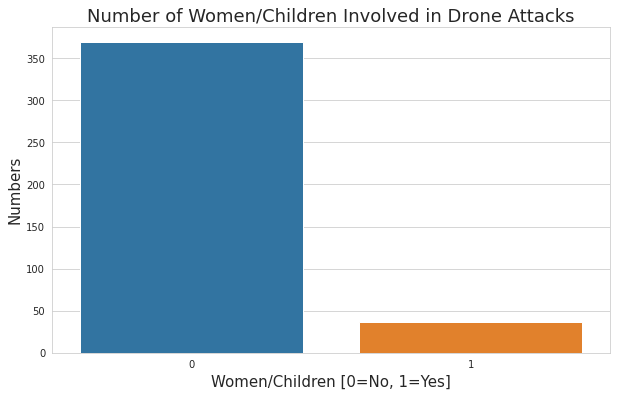

In [50]:
sns.set_style('whitegrid')
plt.subplots(figsize=(10,6))
ax = sns.countplot(x="Women/Children", data=df) # [0=No, 1=Yes]
for container in ax.containers: container   
plt.title("Number of Women/Children Involved in Drone Attacks", fontsize=18)
plt.xlabel("Women/Children [0=No, 1=Yes]", fontsize=15)
plt.ylabel("Numbers", fontsize=15) 

In [52]:
dfWomenChild = pd.DataFrame(df, columns=['year', 'Women/Children', 'No of Strikes']).astype('int64')
dfWomenChild = dfWomenChild.rename(columns={'No of Strike': 'no-of-strike'})
dfWomenChild
dfWomenChildbyYear = dfWomenChild[dfWomenChild['Women/Children'] != 0 ].groupby(['year', 'Women/Children'], as_index=False).sum().sort_values('year', ascending=False)
dfWomenChildbyYear

,year,Women/Children,No of Strikes
7,2014,1,2
6,2012,1,3
5,2011,1,4
4,2010,1,8
3,2009,1,9
2,2008,1,17
1,2007,1,3
0,2006,1,2


In [53]:
#Drone Attacks on Timeline

trace = go.Scatter(
    x = dfKillbyYear['year'],
    y = dfKillbyYear['No-of-strike'],
    mode = 'lines+markers'
)
fig = go.Figure(data=trace)
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Number of Attacks')
fig.update_layout(title_text='Drone Attacks Timeline', title_x=0.5, title_font_size=25)

fig.show()

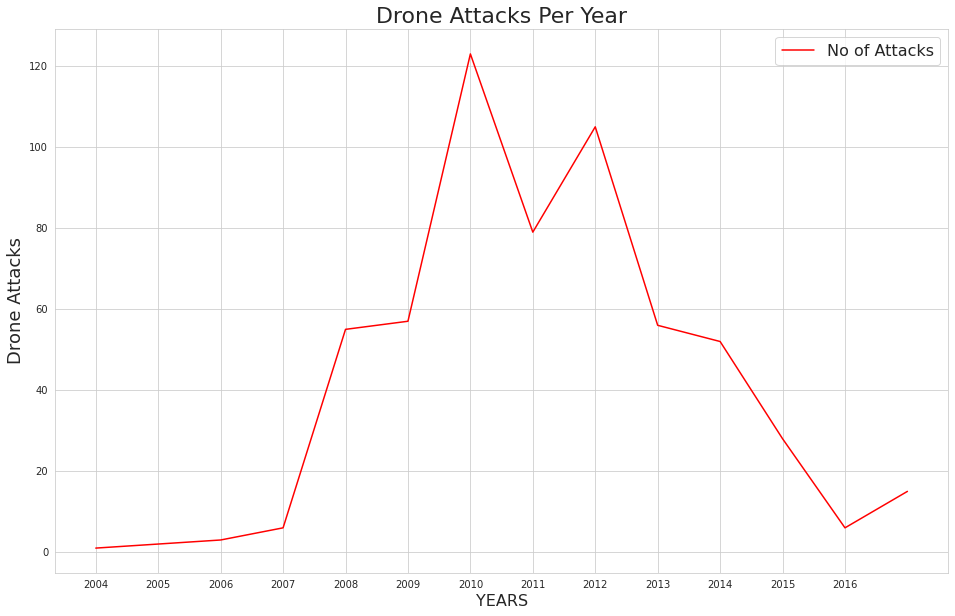

In [54]:
fig = plt.figure(figsize=(16, 10))
x = dfKillbyYear['year']

plt.plot(x, dfKillbyYear['No-of-strike'], color='red', label = 'No of Attacks')

plt.xticks(range(dfKillbyYear['year'].min(), dfKillbyYear['year'].max()))
plt.xlabel("YEARS", fontsize=16)
plt.ylabel("Drone Attacks", fontsize=18)
plt.title("Drone Attacks Per Year", fontsize=22)
plt.legend(fontsize = 16)
plt.show()

In [65]:
#Drone Attacks in Bush & Obama Tenure

# Tenure Bush: 20-01-2001 to 20-01-2009
# Tenure Obama: 20-01-2009 to 20-01-2017
# Tenure Trump: 20-01-2017 to 20-01-2021

print("1. George W. Bush Tenure was: 20-01-2001 to 20-01-2009 \n" + 
      "2. Bark Obama Tenure was: 20-01-2009 to 20-01-2017 \n" + 
      "3. Donald Trump Tenure was: 20-01-2017 to 20-01-2021")
print("-------------------------------------------------------")
print("Number of Drone Attacks in Bush Tenure: ", df[pd.DatetimeIndex(df['Date']) < '2009-01-20']['No of Strikes'].sum())
print("Number of Drone Attacks in Obama Tenure: ", 
      df[ (pd.DatetimeIndex(df['Date']) >= '2009-01-20') & (pd.DatetimeIndex(df['Date']) < '2017-01-20') ]['No of Strikes'].sum() )
print("Number of Drone Attacks in Donald Trump Tenure: ", df[pd.DatetimeIndex(df['Date']) >= '2017-01-20']['No of Strikes'].sum())

print("\n-------------------------------------------------------\n" +
      "Total Drone Attacks From Year 2001 to 2017: ", str(df['No of Strikes'].sum()) + 
      "\n-------------------------------------------------------" )

1. George W. Bush Tenure was: 20-01-2001 to 20-01-2009 
2. Bark Obama Tenure was: 20-01-2009 to 20-01-2017 
3. Donald Trump Tenure was: 20-01-2017 to 20-01-2021
-------------------------------------------------------
Number of Drone Attacks in Bush Tenure:  70.0
Number of Drone Attacks in Obama Tenure:  503.0
Number of Drone Attacks in Donald Trump Tenure:  15.0

-------------------------------------------------------
Total Drone Attacks From Year 2001 to 2017:  588.0
-------------------------------------------------------


In [61]:
df['customDate'] = pd.to_datetime(df['Date'])
df.head()

,Date,Year,Time,Location,City,Province,No of Strikes,Al-Qaeda,Taliban,Civilians Min,...,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F),year,customDate
0,friday- june 18- 2004,2004.0,22:00,near wana,south waziristan,fata,1.0,0,1,0,...,0,blast occured in courtyard of the house of lon...,village in wana,http://archives.dawn.com/2004/06/19/top1.htm,69.9000,33.0333,28.475,83.255,2004,2004-06-18
1,sunday- may 08- 2005,2005.0,23:30,mir ali (near afghan border),north waziristan,fata,1.0,1,0,0,...,0,drone struck a car driven by local warlord- ki...,civilian killied was samiullah khan who was a ...,http://www.msnbc.msn.com/id/7847008/,70.1455,32.9746,11.475,52.655,2005,2005-05-08
2,thursday- december 01- 2005,2005.0,NaN,haisori- miran shah,north waziristan,fata,1.0,1,0,0,...,0,explosive occurred at a mud house,no. 3 al-qaeda's leader abuhamza rabia killed ...,http://edition.cnn.com/2005/world/asiapcf/12/0...,70.1455,32.9746,7.080,44.744,2005,2005-12-01
3,friday- january 06- 2006,2006.0,NaN,saidgai village- 115km north of wana,north waziristan,fata,1.0,0,0,0,...,0,NaN,NaN,http://www.reuters.com/article/2007/04/27/us-p...,70.1455,32.9746,0.535,32.963,2006,2006-01-06
4,friday- january 13- 2006,2006.0,3:00,damadola village,bajaur agency,fata,1.0,0,0,0,...,1,three houses were tarheted in damadola village...,masood khan house was among those bombed. want...,http://www.dailytimes.com.pk/default.asp?page=...,71.5000,34.6833,10.025,50.045,2006,2006-01-13


In [64]:
dfTenure = pd.DataFrame()
dfTenure['year'] = df['year'].unique()
dfTenure['GWBush'] = 0
dfTenure['BObama'] = 0
dfTenure['DTrump'] = 0

for x, xRow in dfTenure.iterrows():
    
    if(xRow['year'] <= 2009):
        getTot = df[(df['customDate'] < '2009-01-20') & (df['year'] == xRow['year'])]['No of Strikes'].sum()
        dfTenure.at[x, 'GWBush'] = getTot
        dfTenure.at[x, 'BObama'] = dfTenure.at[x, 'BObama'] + 0
        dfTenure.at[x, 'DTrump'] = dfTenure.at[x, 'DTrump'] + 0
        
    if(xRow['year'] >= 2009):
        getTot = df[(df['customDate'] >= '2009-01-20') & (df['customDate'] < '2017-01-20') & (df['year'] == xRow['year']) ]['No of Strikes'].sum()
        dfTenure.at[x, 'GWBush'] = dfTenure.at[x, 'GWBush'] + 0
        dfTenure.at[x, 'DTrump'] = dfTenure.at[x, 'DTrump'] + 0
        dfTenure.at[x, 'BObama'] = getTot
        
    if (xRow['year'] >= 2017):
        getTot = df[(df['customDate'] >= '2017-01-20') & (df['year'] == xRow['year']) ]['No of Strikes'].sum()
        dfTenure.at[x, 'GWBush'] = dfTenure.at[x, 'GWBush'] + 0
        dfTenure.at[x, 'BObama'] = dfTenure.at[x, 'GWBush'] + 0
        dfTenure.at[x, 'DTrump'] = getTot
        
dfTenure

,year,GWBush,BObama,DTrump
0,2004,1,0,0
1,2005,2,0,0
2,2006,3,0,0
3,2007,6,0,0
4,2008,55,0,0
5,2009,3,54,0
6,2010,0,123,0
7,2011,0,79,0
8,2012,0,105,0
9,2013,0,56,0


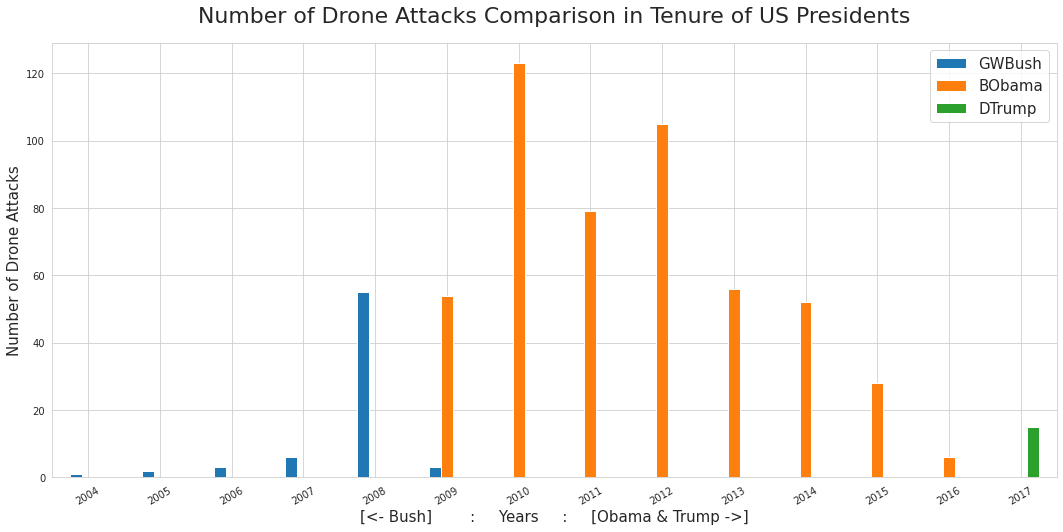

In [66]:
fig = dfTenure.plot(x='year', 
                y=['GWBush', 'BObama', 'DTrump'], 
                kind="bar", 
                figsize=(18,8), align='center'
                 )
fig.set_title("Number of Drone Attacks Comparison in Tenure of US Presidents", pad=20, fontdict={'fontsize':22})
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("[<- Bush]        :     Years     :     [Obama & Trump ->]", fontsize=15)
plt.ylabel("Number of Drone Attacks", fontsize=15)
fig.legend(loc=1,fontsize=15)

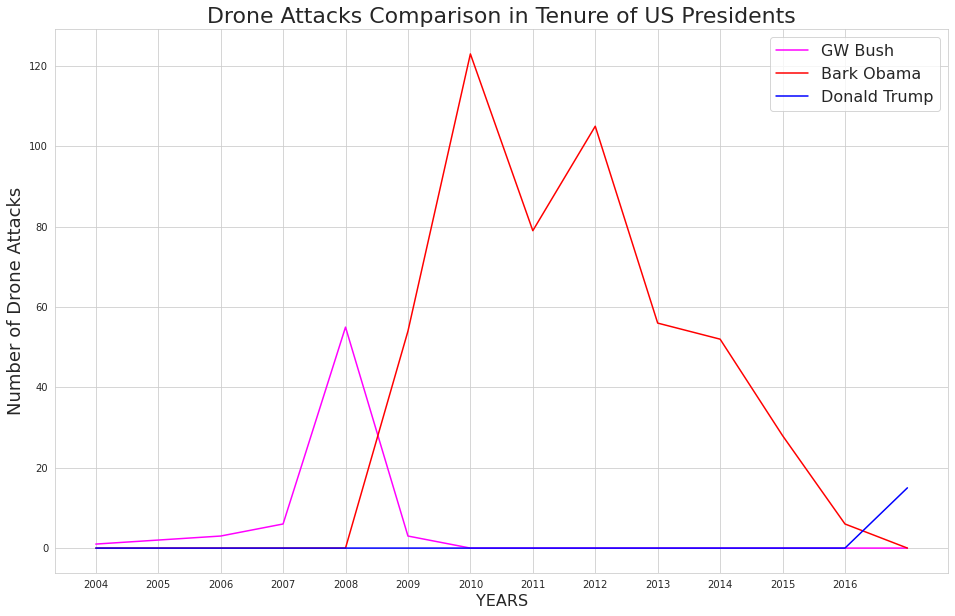

In [67]:
fig = plt.figure(figsize=(16, 10))
x = dfTenure['year']

plt.plot(x, dfTenure['GWBush'], color='magenta', label = 'GW Bush')
plt.plot(x, dfTenure['BObama'], color='red', label = 'Bark Obama')
plt.plot(x, dfTenure['DTrump'], color='blue', label = 'Donald Trump')

plt.xticks(range(df['year'].min(), df['year'].max()))
plt.xlabel("YEARS", fontsize=16)
plt.ylabel("Number of Drone Attacks", fontsize=18)
plt.title("Drone Attacks Comparison in Tenure of US Presidents", fontsize=22)
plt.legend(fontsize = 16)
plt.show()

In [68]:
#Correlations


from sklearn import preprocessing

# Converting Categorical to Numeric data, it will made easy for selecting features

df_corr = pd.DataFrame(df, columns=['No of Strikes', 'Date', 'Time', 'customDate'])

df_corr['Time'] = df_corr['Time'].fillna('0')
df_corr['customDate'] = df_corr['customDate'].fillna('0')
df_corr['Time-cat'] = preprocessing.LabelEncoder().fit_transform(df_corr['Time'].values)
df_corr['customDate-cat'] = preprocessing.LabelEncoder().fit_transform(df_corr['customDate'].values)

df_corr.isna().sum()

No of Strikes     0
Date              0
Time              0
customDate        0
Time-cat          0
customDate-cat    0
dtype: int64

In [69]:
feature1 = list(['No of Strikes', 'customDate-cat', 'Time-cat'])
corr1 = df_corr[feature1].corr()
corr1

,No of Strikes,customDate-cat,Time-cat
No of Strikes,1.000000,0.243714,0.041649
customDate-cat,0.243714,1.000000,-0.058688
Time-cat,0.041649,-0.058688,1.000000


In [70]:
corr1.style.background_gradient(cmap='coolwarm')

,No of Strikes,customDate-cat,Time-cat
No of Strikes,1.000000,0.243714,0.041649
customDate-cat,0.243714,1.000000,-0.058688
Time-cat,0.041649,-0.058688,1.000000


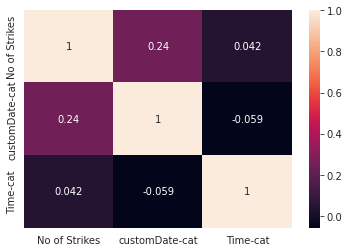

In [71]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr1, annot=True)

In [72]:
#More Information and Visualization

# Number of Drone Attacks Per City/Location
attackpercity = pd.DataFrame(columns=['city', 'total_attack'])
attackpercity['city'] = df['City'].unique().tolist()
attackpercity['total_attack'] = attackpercity['total_attack'].fillna('0').astype(np.int64)
attackpercity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          10 non-null     object
 1   total_attack  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [73]:
for x, xRow in attackpercity.iterrows():
    tot_attack = df[df['City'] == xRow['city']]['No of Strikes'].sum()
    attackpercity.at[x, 'total_attack'] = tot_attack
attackpercity

,city,total_attack
0,south waziristan,112
1,north waziristan,438
2,bajaur agency,5
3,bannu,3
4,khyber,3
5,kurram agency,11
6,orakzai,1
7,khyber agency,9
8,hangu,5
9,dalbandin,1


In [74]:
figCity = [go.Bar(y = attackpercity['total_attack'],
                  x = attackpercity['city'],
                  text = np.round((attackpercity['total_attack']), 1),
                  textposition = 'outside',
                  width = [0.7, 0.7],
                  marker = dict(color = 'lightblue',
                                line_color = 'black',
                                line_width = 2))]

layout = go.Layout(title= 'Drone Attacks Per City',
                   xaxis = dict(title = 'Cities Name'),
                   yaxis = dict(title = 'Drone Attacks'),
                   width = 800,
                   height = 600,
                   template = 'plotly_white')

fig_plot = go.Figure(data = figCity, layout = layout)
iplot(fig_plot)

In [75]:
dfCivilians = pd.DataFrame(df, columns=['year', 'Al-Qaeda', 'Taliban', 
                                        'Civilians Min', 'Civilians Max', 
                                        'Foreigners Min', 'Foreigners Max'])

dfCivilians['Civilians'] = (((dfCivilians['Civilians Min'] + dfCivilians['Civilians Max'])/2) + 
                            ((dfCivilians['Foreigners Min'] + dfCivilians['Foreigners Max'])/2)).apply(np.ceil).astype('int64')
dfCivilians = dfCivilians.drop(['Civilians Min', 'Civilians Max', 'Foreigners Min', 'Foreigners Max'], axis=1)

dfCivilians['Terrorist'] = (dfCivilians['Al-Qaeda'] + dfCivilians['Taliban']).apply(np.ceil).astype('int64')
#dfCivilians
dfCiviliansbyYear = dfCivilians.groupby(['year'], as_index=False).sum().sort_values('year', ascending=True)
dfCiviliansbyYear

,year,Al-Qaeda,Taliban,Civilians,Terrorist
0,2004,0,1,2,1
1,2005,2,0,3,2
2,2006,0,0,50,0
3,2007,0,0,36,0
4,2008,11,25,265,36
5,2009,13,112,437,125
6,2010,1,110,731,111
7,2011,6,54,381,60
8,2012,7,80,203,87
9,2013,5,83,64,88


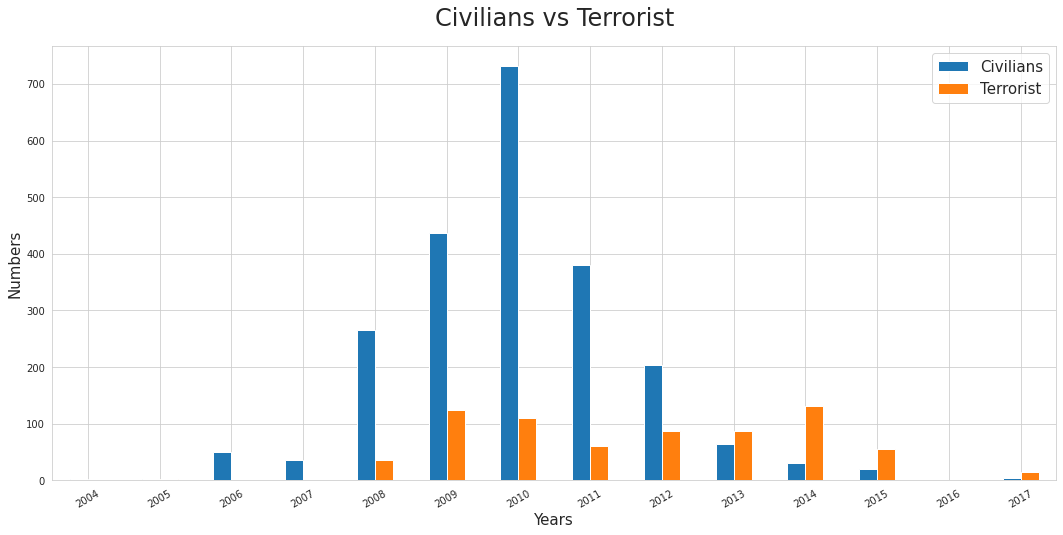

In [76]:
fig = dfCiviliansbyYear.plot(x='year', 
                             y=['Civilians', 'Terrorist'], 
                             kind="bar", 
                             figsize=(18,8), align='center'
                            )
fig.set_title("Civilians vs Terrorist", pad=20, fontdict={'fontsize':24})
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Years", fontsize=15)
plt.ylabel("Numbers", fontsize=15)
fig.legend(loc=1,fontsize=15)

In [ ]:
#Thankyou